In [85]:
# note: fdfdpy and nonlinear_avm must be in PATH
from fdfdpy.Fdfd import Fdfd
from optimization import Optimization
from structures import three_port

import numpy as np
import matplotlib.pylab as plt
import scipy.sparse as sp

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
lambda0 = 2e-6
c0 = 3e8
omega = 2*np.pi*c0/lambda0  # angular frequency (2pi)
dl = 0.4e-1                   # grid size (L0)
Nx = 200
Ny = 150
nx, ny = int(Nx/2), int(Ny/2)
shape = (Nx,Ny)           # shape of domain (in grids)
NPML = [10, 10]             # number of pml grid points on x and y borders
pol = 'Ez'                  # polarization (either 'Hz' or 'Ez')

In [97]:
# define the two port parameters
L = 3.24
H = 3
w = .2
d = 1.5
# d = int(d/2/dl)*dl*2

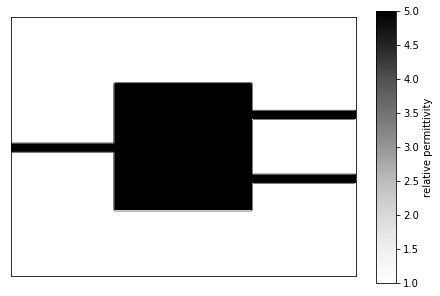

In [98]:
# define permittivity of three port system
eps_r = three_port(L, H, w, d, dl, shape, eps_start=5)
simulation = Fdfd(omega,eps_r,dl,NPML,pol)
simulation.plt_eps()
plt.show()

input power of 10.14393383992771 W/L0


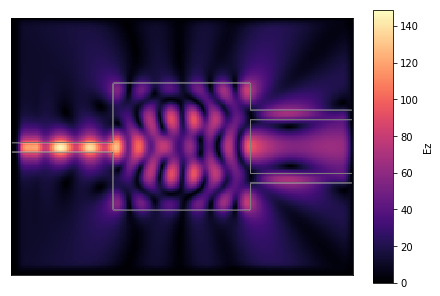

In [99]:
# set the modal source and probes
simulation.add_mode(3.5, 'x', [15, ny], 100, scale=70)
simulation.setup_modes()
print('input power of {} W/L0'.format(simulation.W_in))
simulation.solve_fields()
simulation.plt_abs(outline=True, cbar=True);

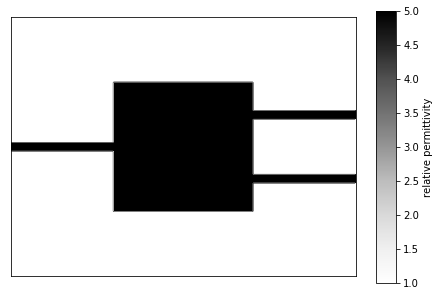

input power of 10.215649706286076 W/L0


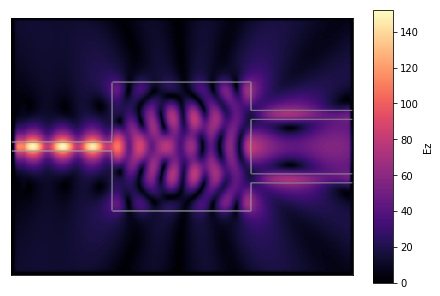

In [100]:
# Define a finer meshing of the same structure
dl = 0.2e-1                   # grid size (L0)
Nx = 400
Ny = 300
nx, ny = int(Nx/2), int(Ny/2)
shape = (Nx,Ny)           # shape of domain (in grids)
# define permittivity of three port system
eps_r = three_port(L, H, w, d, dl, shape, eps_start=5)
simulation = Fdfd(omega,eps_r,dl,NPML,pol)
simulation.plt_eps()
plt.show()
# simulation to solve
simulation = Fdfd(omega, eps_r, dl, NPML, 'Ez')
simulation.add_mode(3.5, 'x', [15, ny], 100, scale=70*2*np.sqrt(2))
simulation.setup_modes()
print('input power of {} W/L0'.format(simulation.W_in))
simulation.solve_fields()
simulation.plt_abs(outline=True, cbar=True);

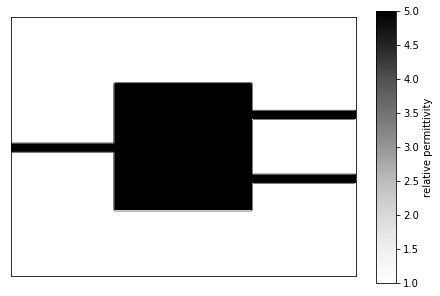

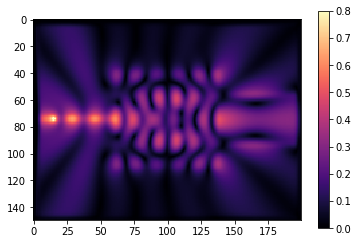

1.0


In [71]:
# Put just a point source
dl = 0.4e-1                   # grid size (L0)
Nx = 200
Ny = 150
nx, ny = int(Nx/2), int(Ny/2)
shape = (Nx,Ny)           # shape of domain (in grids)
# define permittivity of three port system
eps_r = three_port(L, H, w, d, dl, shape, eps_start=5)
simulation = Fdfd(omega,eps_r,dl,NPML,pol)
simulation.plt_eps()
plt.show()
# simulation to solve
simulation = Fdfd(omega, eps_r, dl, NPML, 'Ez')
b = np.zeros(eps_r.shape)
b[15, ny -1] = 1
simulation.src = b
# print('input power of {} W/L0'.format(simulation.W_in))
(Hx, Hy, Ez) = simulation.solve_fields()
plt.imshow(np.abs(Ez).T, cmap = "magma")
plt.clim(0, 0.8)
plt.colorbar()
plt.show()
print(np.sum(b))

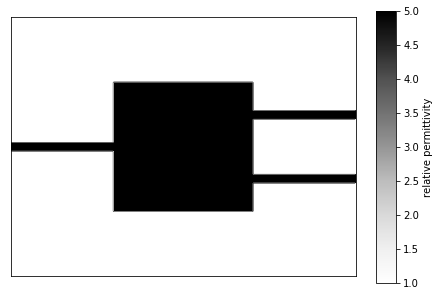

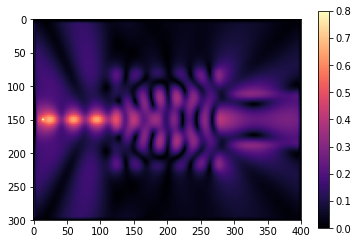

4.0


In [70]:
# Put just a point source
dl = 0.2e-1                   # grid size (L0)
Nx = 400
Ny = 300
nx, ny = int(Nx/2), int(Ny/2)
shape = (Nx,Ny)           # shape of domain (in grids)
# define permittivity of three port system
eps_r = three_port(L, H, w, d, dl, shape, eps_start=5)
simulation = Fdfd(omega,eps_r,dl,NPML,pol)
simulation.plt_eps()
plt.show()
# simulation to solve
simulation = Fdfd(omega, eps_r, dl, NPML, 'Ez')
b = np.zeros(eps_r.shape)
b[14:16, ny-1:ny+1] = 1
simulation.src = b
# print('input power of {} W/L0'.format(simulation.W_in))
(Hx, Hy, Ez) = simulation.solve_fields()
plt.imshow(np.abs(Ez).T, cmap = "magma")
plt.clim(0, 0.8)
plt.colorbar()
plt.show()
print(np.sum(b))